In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [50]:
nlist = glob('/home/mehdi/data/lognormal/v0/clustering/nbar_aug20/nbarmock_*_lrg_bmzls_256_noweight.npy')
print(len(nlist))
# nlist = np.random.permutation(nlist)
nbar = []
for fl in nlist:
    d_ = np.load(fl, allow_pickle=True)
    nbar.append(d_[5]['nnbar']-1.0)
    print('.', end='')
nbar = np.array(nbar)

1000
...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [51]:
nbar[0, :]

array([-0.00248622,  0.00042671, -0.00594952, -0.00214794,  0.00161336,
        0.00087775,  0.00326179,  0.00440443])

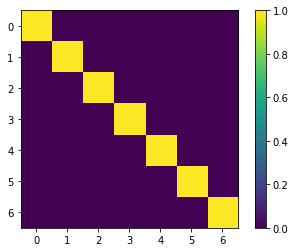

In [54]:
ix = np.array([1, 2, 3, 4, 5, 6, 7])
# ix = np.array([0, 1, 2, 3, 4, 5])#, 3, 4, 5, 6, 7])
nbar_ = nbar[:, ix]
cov = np.cov(nbar_, rowvar=False)

icov = np.linalg.inv(cov)
plt.imshow(icov.dot(cov))
plt.colorbar()

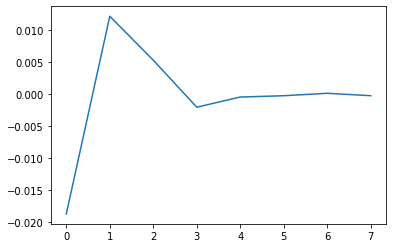

In [6]:
plt.plot(np.mean(nbar, axis=0))

(array([ 2.,  2., 12., 17., 21., 48., 25., 11.,  6.,  6.]),
 array([-0.02390812, -0.01953451, -0.01516089, -0.01078727, -0.00641365,
        -0.00204003,  0.00233358,  0.0067072 ,  0.01108082,  0.01545444,
         0.01982806]),
 <a list of 10 Patch objects>)

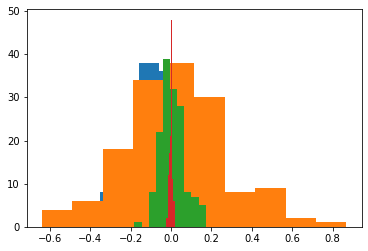

In [7]:
plt.hist(nbar[:, 0])
plt.hist(nbar[:, 1])
plt.hist(nbar[:, 2])
plt.hist(nbar[:, 7])

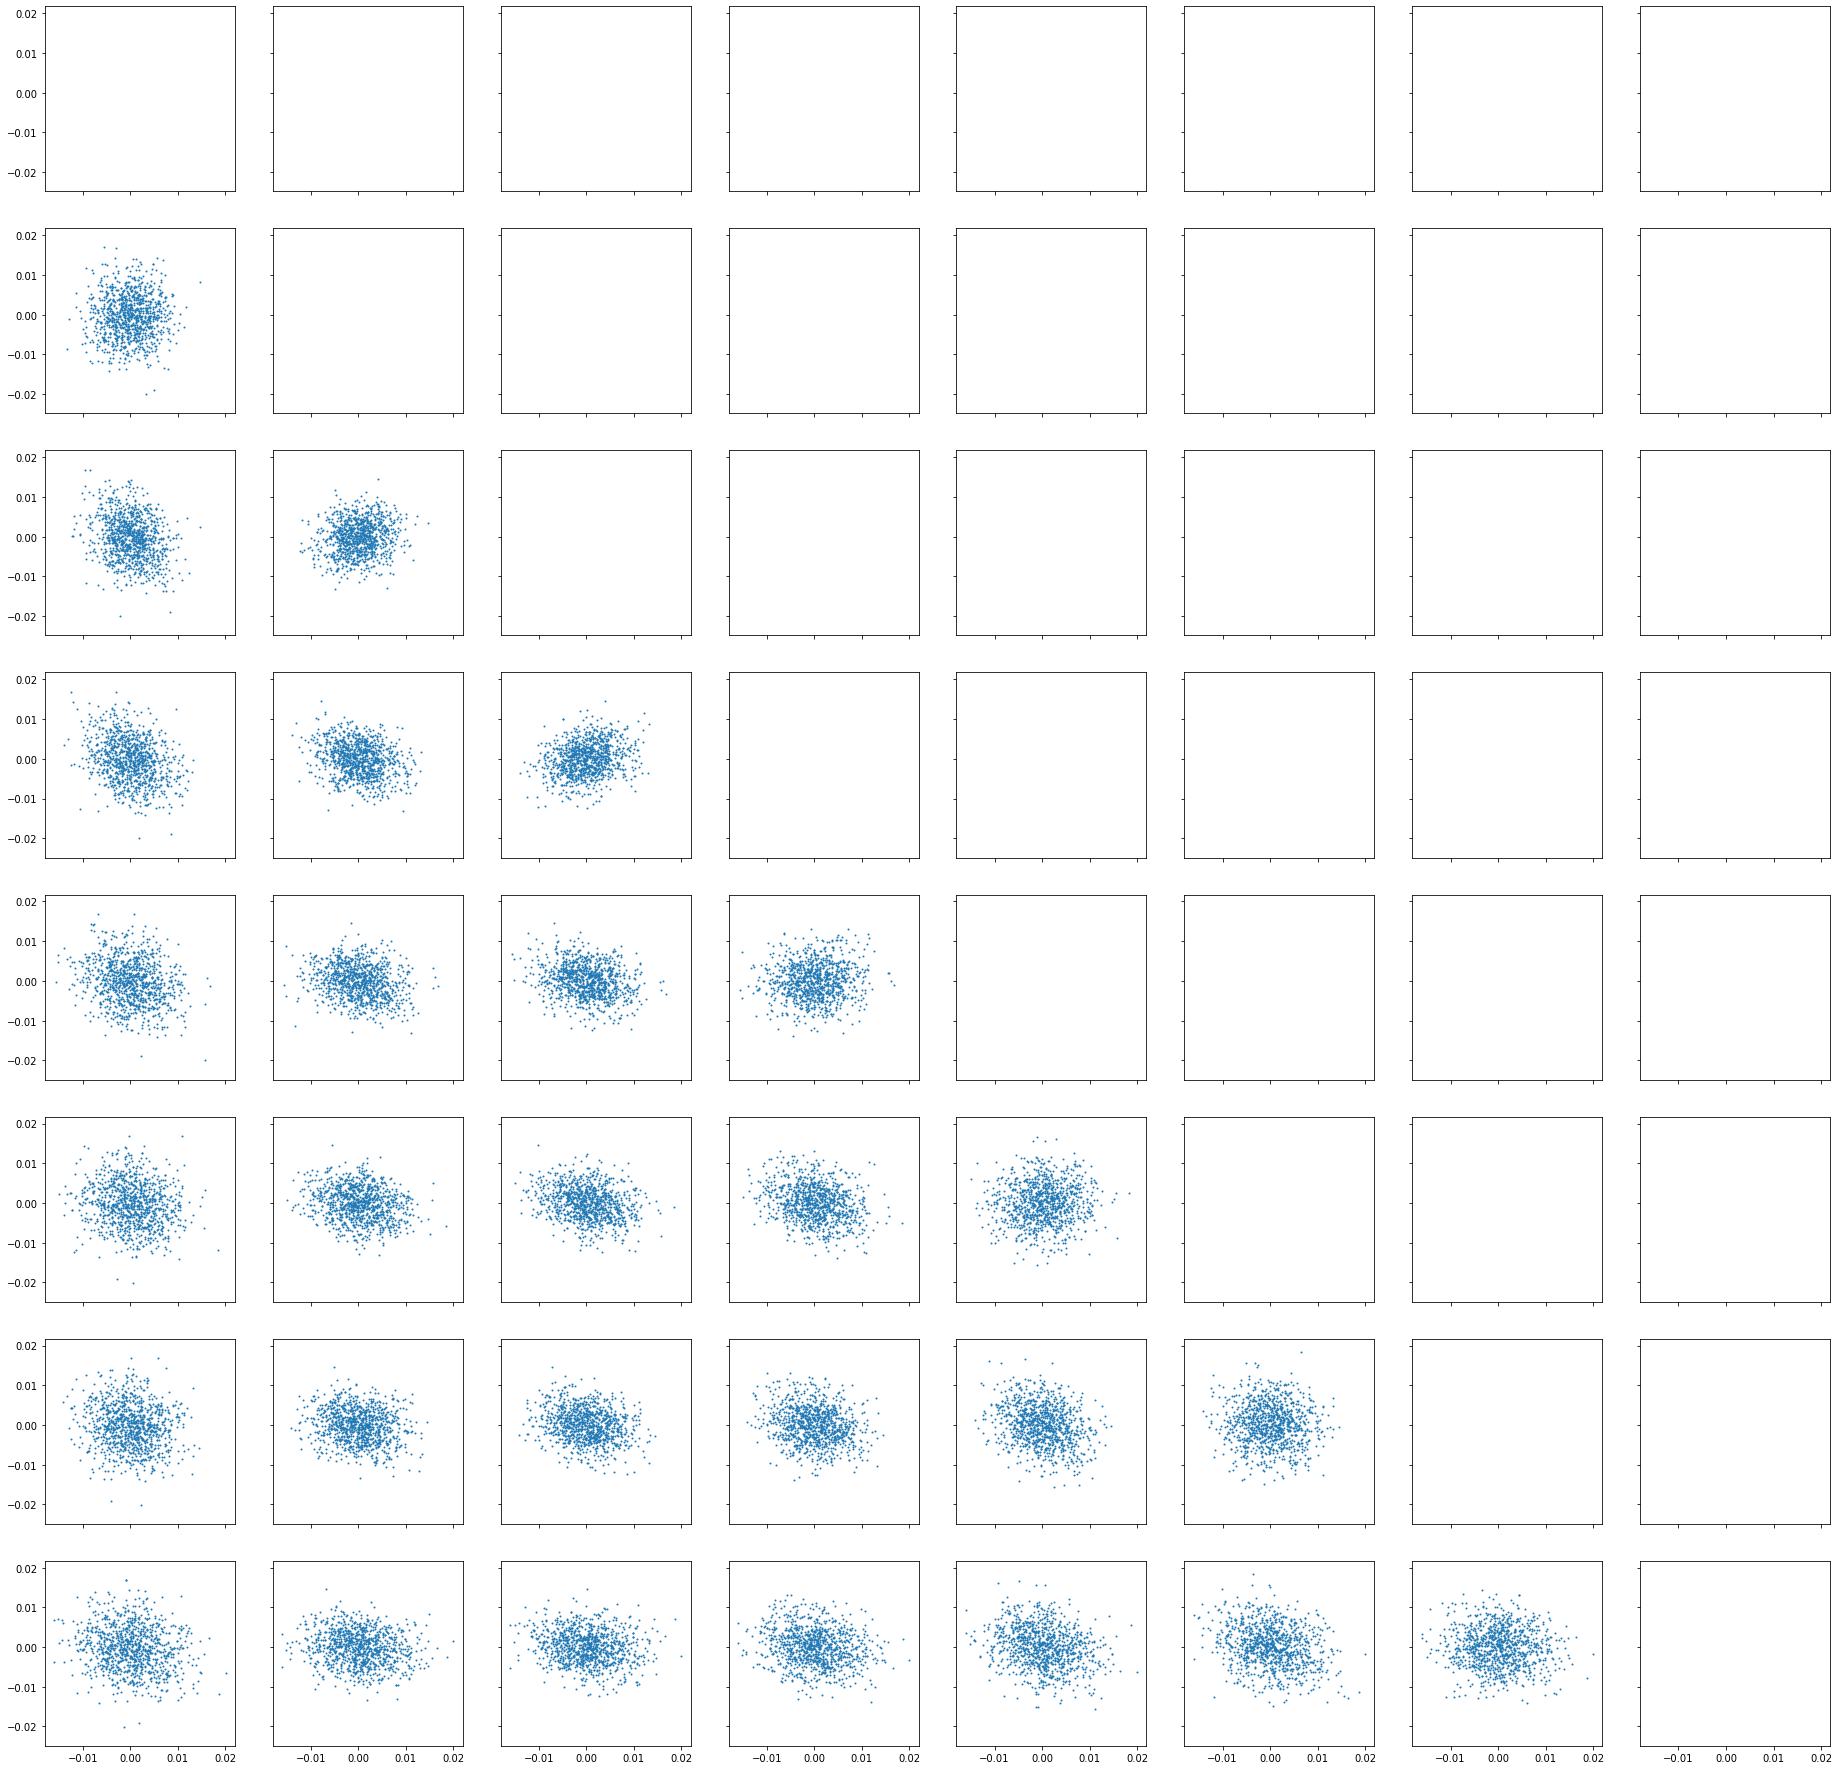

In [26]:
fg, ax = plt.subplots(ncols=8, nrows=8, sharex=True, sharey=True, 
                     figsize=(32, 32))
for i in range(8):
    for j in range(0, i):
        if j==i:
            ax[i][j].hist(nbar[:, i], histtype='step')
        else:
            ax[i][j].scatter(nbar[:, i], nbar[:, j], 1.)
        #print(np.cov(nbar[:, i], nbar[:, j]))

In [94]:
nbar_mean = np.mean(nbar, axis=0)

In [95]:
nbar_cov = np.cov(nbar, rowvar=False)

<ErrorbarContainer object of 3 artists>

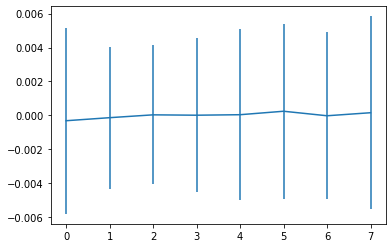

In [96]:
plt.errorbar(np.arange(8), nbar_mean, np.diag(nbar_cov)**0.5)

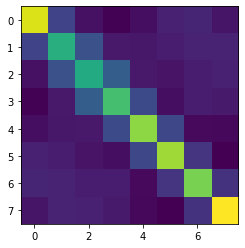

In [97]:
plt.imshow(nbar_cov)

In [98]:
np.savez('meandens_lognormal_lrg_bmzls', **{'mean':nbar_mean, 'covmat':nbar_cov})

In [99]:
data = np.load('meandens_lognormal_lrg_bmzls.npz')
data.files

['mean', 'covmat']

In [100]:
data['mean']

array([-3.16280310e-04, -1.36651035e-04,  3.09925624e-05,  8.86788917e-06,
        3.87460558e-05,  2.42747048e-04, -2.36639529e-05,  1.55254446e-04])

In [101]:
data['covmat']

array([[ 3.02027461e-05,  6.59543781e-07, -5.63081403e-06,
        -7.17750046e-06, -5.91493791e-06, -3.71389788e-06,
        -3.31886267e-06, -5.10669479e-06],
       [ 6.59543781e-07,  1.75330889e-05,  2.47531277e-06,
        -4.59689178e-06, -4.75862408e-06, -4.29972954e-06,
        -3.43714404e-06, -3.57584861e-06],
       [-5.63081403e-06,  2.47531277e-06,  1.68476263e-05,
         4.34102454e-06, -4.74584313e-06, -5.35781430e-06,
        -4.20681033e-06, -3.72298639e-06],
       [-7.17750046e-06, -4.59689178e-06,  4.34102454e-06,
         2.06586772e-05,  1.48281313e-06, -5.91060126e-06,
        -4.30397313e-06, -4.49391594e-06],
       [-5.91493791e-06, -4.75862408e-06, -4.74584313e-06,
         1.48281313e-06,  2.55739944e-05,  1.20589382e-06,
        -6.30202105e-06, -6.54181046e-06],
       [-3.71389788e-06, -4.29972954e-06, -5.35781430e-06,
        -5.91060126e-06,  1.20589382e-06,  2.66751679e-05,
        -1.21111630e-06, -7.38850697e-06],
       [-3.31886267e-06, -3.437144

In [116]:
nb_e = np.load('/home/mehdi/data/eboss/data/v7_2/3.0/measurements/nnbar/nnbar_NGC_known_mainhighz_512_v7_2_main_512.npy', allow_pickle=True)

In [112]:
nb_m = np.load('/home/mehdi/data/eboss/mocks/1.0/measurements/nnbar/nnbar_NGC_knownsystot_mainhighz_512_v7_0_0001_main_512.npy', allow_pickle=True)

In [117]:
nb_e[0]['bin_edges']

array([ 1.00000003,  4.24999983,  4.99999983,  5.74999982,  6.75000035,
        8.0000002 ,  9.75000032, 12.99999963, 54.00000278])

In [118]:
nb_m[0]['bin_edges']

array([ 1.00000003,  4.24999983,  4.99999983,  5.74999982,  6.75000035,
        8.0000002 ,  9.75000032, 12.99999963, 54.00000278])

In [106]:
nb_m[0]['bin_avg']

array([ 51.37505189,  60.08450393,  66.57427169,  74.29108066,
        86.13690533, 105.65623461, 137.6653392 , 218.94879017])

In [107]:
nb_e[0]['bin_avg']

array([ 3.63261815,  4.68739762,  5.43686674,  6.22099142,  7.24580238,
        8.75928804, 11.18927632, 17.59529533])

In [86]:
np.linalg.matrix_rank(cov)

7

In [25]:
import fitsio as ft

In [26]:
data = ft.read('/home/mehdi/data/rongpu/imaging_sys/tables/nlrg_features_bmzls_256.fits')

In [27]:
nran = np.ones(data['hpix'].size)
mask = np.ones(data['hpix'].size, '?')
sysm = data['features']

In [28]:
import healpy as hp

In [29]:
ngal_ = hp.read_map('/home/mehdi/data/lognormal/v0/lrg-5-f1z1.fits')
ngal = ngal_[data['hpix']]

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [30]:
ngal

array([19., 30., 35., ..., 26., 17., 43.])

In [31]:
nran

array([1., 1., 1., ..., 1., 1., 1.])

In [32]:
mask

array([ True,  True,  True, ...,  True,  True,  True])

In [35]:
np.array_equal(ngal[mask], ngal)

True

In [55]:
mask.sum()

97775

In [57]:
nran[mask].sum()

97775.0

In [58]:
ngal_.size, ngal.size

(786432, 97775)

In [59]:
import sys
sys.path.append('/home/mehdi/github/LSSutils')
from lssutils.lab import MeanDensity

In [60]:
sysm.shape

(97775, 13)

In [61]:
nb = MeanDensity(ngal, nran, mask, sysm[:, 0])
nb.run()

In [64]:
output = np.load('/home/mehdi/data/lognormal/v0/clustering/nbarmock_5_lrg_bmzls_256_noweight.npy', allow_pickle=True)

In [65]:
output[0]

{'nnbar': array([1.00944236, 1.00086837, 0.99899205, 0.9914141 , 0.99330388,
        1.01122984, 0.99949276, 0.99525624]),
 'area': array([12222., 12222., 12222., 12222., 12222., 12222., 12222., 12221.]),
 'nnbar_err': array([0.00222917, 0.00254014, 0.00277747, 0.00265678, 0.00269142,
        0.00232741, 0.00187719, 0.00399519]),
 'bin_edges': array([0.00367896, 0.01166427, 0.01457686, 0.01783316, 0.02281092,
        0.03234769, 0.04577622, 0.06690618, 0.41883251]),
 'bin_avg': array([0.00951587, 0.01314601, 0.01615297, 0.02008719, 0.02713269,
        0.03881256, 0.05500321, 0.10328343]),
 'attr': {'njack': 20, 'nbar': 30.393750958834058, 'npix2area': 1.0},
 'sys': 'EBV'}

In [66]:
nb.output

{'nnbar': array([1.00944236, 1.00086837, 0.99899205, 0.9914141 , 0.99330388,
        1.01122984, 0.99949276, 0.99525624]),
 'area': array([12222., 12222., 12222., 12222., 12222., 12222., 12222., 12221.]),
 'nnbar_err': array([0.00222917, 0.00254014, 0.00277747, 0.00265678, 0.00269142,
        0.00232741, 0.00187719, 0.00399519]),
 'bin_edges': array([0.00367896, 0.01166427, 0.01457686, 0.01783316, 0.02281092,
        0.03234769, 0.04577622, 0.06690618, 0.41883251]),
 'bin_avg': array([0.00951587, 0.01314601, 0.01615297, 0.02008719, 0.02713269,
        0.03881256, 0.05500321, 0.10328343]),
 'attr': {'njack': 20, 'nbar': 30.393750958834058, 'npix2area': 1.0}}

In [70]:
(nb['nnbar']*(nb['area']*nb['attr']['nbar'])).sum()

2971749.0

In [71]:
ngal.sum()

2971749.0